In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [3]:
import io
# returns curve as numpy array, instead of string b'\x93NUMPY\x01\x00v.....
def get_curve(txt):
    out = io.BytesIO(txt)
    out.seek(0)
    return np.load(out)

In [4]:
FILEPATH = '/home/jovyan/data/lightning/data-upjs/detached.db'
# creating a connection to a .db file in sqllite format
conn = sqlite3.connect(FILEPATH)

In [5]:
# retrieve table names from the database
sql_query = """SELECT name FROM sqlite_master WHERE type='table';"""
cursor = conn.cursor()
cursor.execute(sql_query)
print(cursor.fetchall())

[('parameters',), ('curves',), ('auxiliary',)]


In [6]:
# load the table 'parameters'
df_parameters = pd.read_sql_query("SELECT id, overcontact FROM parameters", conn)

In [7]:
df_parameters.head(70)

,id,overcontact
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
65,65,0
66,66,0
67,67,0
68,68,0


In [8]:
# load the table 'curves'
df_curves = pd.read_sql_query("SELECT * FROM curves ORDER BY RANDOM() LIMIT 50000", conn)
conn.close()

In [11]:
df_curves.head(2)

,id,Bessell_U,Bessell_B,Bessell_V,Bessell_R,Bessell_I,SLOAN_u,SLOAN_g,SLOAN_r,SLOAN_i,SLOAN_z,Kepler,GaiaDR2,TESS
0,6122085,"b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \..."
1,10185314,"b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \..."


In [10]:
# load one curve
my_curve_values = np.frombuffer(df_curves["Bessell_U"][3000])
my_curve_values1 = get_curve(df_curves["Bessell_U"][3000])
print(my_curve_values)


[1.87585069e-309 1.17119999e+171 5.22741680e-037 8.44740097e+252
 2.65141232e+180 9.92152605e+247 2.16209968e+233 1.39938206e-076
 6.01399921e-154 6.01347002e-154 6.01347002e-154 6.01347002e-154
 6.01347002e-154 6.01347002e-154 6.01347002e-154 6.55490914e-260
 9.61990842e-001 9.61903770e-001 9.61979090e-001 9.62063090e-001
 9.62280353e-001 9.62227183e-001 9.62287657e-001 9.62349130e-001
 9.62584039e-001 9.62885189e-001 9.63302142e-001 9.63452576e-001
 9.63929705e-001 9.65232421e-001 9.65883323e-001 9.66169562e-001
 9.66455664e-001 9.66726230e-001 9.66939263e-001 9.67222329e-001
 9.67554835e-001 9.67880624e-001 9.68212921e-001 9.68516758e-001
 9.68828539e-001 9.69227355e-001 9.69655924e-001 9.70066094e-001
 9.70458980e-001 9.70819279e-001 9.71228403e-001 9.71711176e-001
 9.72181885e-001 9.72641636e-001 9.73091773e-001 9.73554317e-001
 9.74094510e-001 9.74645331e-001 9.75150109e-001 9.75625492e-001
 9.76124023e-001 9.76643412e-001 9.77208486e-001 9.77784797e-001
 9.78333828e-001 9.788437

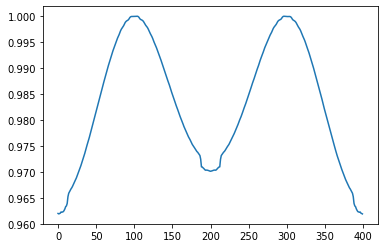

In [12]:
# curve plot
plt.plot(my_curve_values[16:])
plt.show()

In [13]:
row = df_curves.iloc[7800]
row_curves = row[1:]
my_curves = row_curves.apply(get_curve) 
print(my_curves)

Bessell_U    [0.39665344228475724, 0.39666900128109955, 0.3...
Bessell_B    [0.5253859786354698, 0.5254053570698278, 0.525...
Bessell_V    [0.6256067117981168, 0.6256322374966901, 0.625...
Bessell_R    [0.6777377786798322, 0.6777679225267516, 0.677...
Bessell_I    [0.7478968914573363, 0.7479329892488993, 0.748...
SLOAN_u      [0.3709207094573126, 0.3709352368800116, 0.370...
SLOAN_g      [0.5587348383338651, 0.5587561237026564, 0.558...
SLOAN_r      [0.6684865720877363, 0.6685158352241017, 0.668...
SLOAN_i      [0.7294743954414704, 0.7295088882073278, 0.729...
SLOAN_z      [0.763752634575591, 0.7637908069337564, 0.7638...
Kepler       [0.6392951908096933, 0.6393221481495657, 0.639...
GaiaDR2      [0.6162770790391743, 0.6163033540737046, 0.616...
TESS         [0.7140748621594067, 0.7141066716168025, 0.714...
Name: 7800, dtype: object


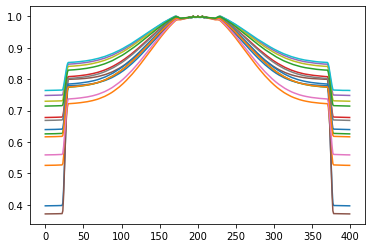

In [14]:
# plot one curve of all 13 filters
for c in my_curves:
    plt.plot(c)
    
plt.show()

In [15]:
# The  parameter 'overcontact' is assigned to each curve in the table 'Curves' so that only one table is created
df1 = df_curves[["id","Bessell_U", "Bessell_B", "Bessell_V", "Bessell_R", "Bessell_I"]]
df2 = df_parameters[["id", "overcontact"]]
df_merged = pd.merge(df1,df2,on="id")
df_merged["Bessell_U"] = df_merged["Bessell_U"].apply(get_curve)
df_merged["Bessell_B"] = df_merged["Bessell_B"].apply(get_curve)
df_merged["Bessell_V"] = df_merged["Bessell_V"].apply(get_curve)
df_merged["Bessell_R"] = df_merged["Bessell_R"].apply(get_curve)
df_merged["Bessell_I"] = df_merged["Bessell_I"].apply(get_curve)

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           50000 non-null  int64 
 1   Bessell_U    50000 non-null  object
 2   Bessell_B    50000 non-null  object
 3   Bessell_V    50000 non-null  object
 4   Bessell_R    50000 non-null  object
 5   Bessell_I    50000 non-null  object
 6   overcontact  50000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 3.1+ MB


In [16]:
# saving the table in .pkl format
df_merged.to_pickle("overcontact_0_random_50000.pkl")